In [14]:
# Import necessary libraries
import sys
import os
import numpy as np
import pandas as pd
import json
import sqlite3
%load_ext sql
import matplotlib.pyplot as plt

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [2]:
from sqlalchemy import Column, Integer, String, ForeignKey
from sqlalchemy.orm import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

In [3]:
# Directories
# Main directory
main_dir = os.path.abspath('..\\\\..\\\\')
# Audio data directory
data_dir = os.path.join(main_dir, 'Data')

In [4]:
# Read the metadata file
file_name = 'database_cleaned.csv'
df = pd.read_csv(os.path.join(data_dir, file_name), header=0, index_col=0)
df

,type,name,required_age,is_free,detailed_description,about_the_game,short_description,supported_languages,header_image,website,...,total_reviews,controller_support,dlc,demos,recommendations,achievements,reviews,ext_user_account_notice,metacritic,drm_notice
steam_appid,,,,,,,,,,,,,,,,,,,,,
1198490,game,All That Remains: Part 1,0,False,“Duncan Price is paranoid” they used to say. H...,“Duncan Price is paranoid” they used to say. H...,“Duncan Price is paranoid” they used to say. H...,"English<strong>*</strong>, French, Italian, Ge...",https://cdn.akamai.steamstatic.com/steam/apps/...,https://glitch.games/,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1198510,game,Paperball,0,False,It's time to get rolling!<br><br>Navigate tric...,It's time to get rolling!<br><br>Navigate tric...,It's time to get rolling! Navigate tricky pass...,"English<strong>*</strong>, German, Japanese, D...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cliax-games.com/games/paperball/,...,134,full,"[1209620, 1209621, 1285150]","[{'appid': 1219680, 'description': ''}]",{'total': 143},"{'total': 37, 'highlighted': [{'name': 'Ready ...",NaN,NaN,NaN,NaN
1198550,game,Moderium,0,False,Moderium is a Wave-Based Isometric Action Role...,Moderium is a Wave-Based Isometric Action Role...,Conquer waves of encroaching enemies in this A...,English<strong>*</strong><br><strong>*</strong...,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,...,1,NaN,NaN,"[{'appid': 1220740, 'description': ''}]",NaN,NaN,NaN,NaN,NaN,NaN
1198600,game,Pizza Time Explosion,0,False,"<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...",Welcome to the Pizza Dimension!,English,https://cdn.akamai.steamstatic.com/steam/apps/...,https://electric-prune-juice.itch.io/pizza-tim...,...,18,full,[1220660],NaN,NaN,"{'total': 32, 'highlighted': [{'name': 'Pizza ...",NaN,NaN,NaN,NaN
1198630,game,Customer Cums First!,0,False,"<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...",It's just like any other shopping district in ...,English,https://cdn.akamai.steamstatic.com/steam/apps/...,https://cherrykissgames.com/,...,10,NaN,NaN,NaN,NaN,"{'total': 18, 'highlighted': [{'name': ""Now th...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113770,game,Lunch A Palooza,0,False,"<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...",Lunch A Palooza is a game for everyone! With i...,"English, French, Italian, German, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.alternativesoft.co.uk/lunch-a-paloo...,...,13,full,NaN,NaN,NaN,"{'total': 21, 'highlighted': [{'name': 'You go...",NaN,NaN,NaN,NaN
1113780,game,Uncharted Tides: Port Royal,0,False,"Mason Owens is missing for decades, and yet hi...","Mason Owens is missing for decades, and yet hi...",Dead men tell no tales! And tales about an inf...,"English<strong>*</strong>, French, Italian, Ge...",https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.artifexmundi.com/,...,30,NaN,NaN,NaN,NaN,"{'total': 22, 'highlighted': [{'name': 'Cursed...",NaN,NaN,NaN,NaN
1113000,game,Persona 4 Golden,0,False,"<h1>Digital Deluxe Edition</h1><p><img src=""ht...","<img src=""https://cdn.akamai.steamstatic.com/s...",A coming of age story that sets the protagonis...,"English<strong>*</strong>, Japanese<strong>*</...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,...,29998,full,NaN,NaN,{'total': 42884},"{'total': 50, 'highlighted': [{'name': 'Golden...",“You can now enjoy the masterpiece in its best...,NaN,NaN,Denuvo Anti-tamper


In [5]:
df = df.reset_index()

In [7]:
df

,steam_appid,type,name,required_age,is_free,detailed_description,about_the_game,short_description,supported_languages,header_image,...,total_reviews,controller_support,dlc,demos,recommendations,achievements,reviews,ext_user_account_notice,metacritic,drm_notice
0,1198490,game,All That Remains: Part 1,0,False,“Duncan Price is paranoid” they used to say. H...,“Duncan Price is paranoid” they used to say. H...,“Duncan Price is paranoid” they used to say. H...,"English<strong>*</strong>, French, Italian, Ge...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1198510,game,Paperball,0,False,It's time to get rolling!<br><br>Navigate tric...,It's time to get rolling!<br><br>Navigate tric...,It's time to get rolling! Navigate tricky pass...,"English<strong>*</strong>, German, Japanese, D...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,134,full,"[1209620, 1209621, 1285150]","[{'appid': 1219680, 'description': ''}]",{'total': 143},"{'total': 37, 'highlighted': [{'name': 'Ready ...",NaN,NaN,NaN,NaN
2,1198550,game,Moderium,0,False,Moderium is a Wave-Based Isometric Action Role...,Moderium is a Wave-Based Isometric Action Role...,Conquer waves of encroaching enemies in this A...,English<strong>*</strong><br><strong>*</strong...,https://cdn.akamai.steamstatic.com/steam/apps/...,...,1,NaN,NaN,"[{'appid': 1220740, 'description': ''}]",NaN,NaN,NaN,NaN,NaN,NaN
3,1198600,game,Pizza Time Explosion,0,False,"<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...",Welcome to the Pizza Dimension!,English,https://cdn.akamai.steamstatic.com/steam/apps/...,...,18,full,[1220660],NaN,NaN,"{'total': 32, 'highlighted': [{'name': 'Pizza ...",NaN,NaN,NaN,NaN
4,1198630,game,Customer Cums First!,0,False,"<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...",It's just like any other shopping district in ...,English,https://cdn.akamai.steamstatic.com/steam/apps/...,...,10,NaN,NaN,NaN,NaN,"{'total': 18, 'highlighted': [{'name': ""Now th...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617,1113770,game,Lunch A Palooza,0,False,"<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...",Lunch A Palooza is a game for everyone! With i...,"English, French, Italian, German, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,13,full,NaN,NaN,NaN,"{'total': 21, 'highlighted': [{'name': 'You go...",NaN,NaN,NaN,NaN
4618,1113780,game,Uncharted Tides: Port Royal,0,False,"Mason Owens is missing for decades, and yet hi...","Mason Owens is missing for decades, and yet hi...",Dead men tell no tales! And tales about an inf...,"English<strong>*</strong>, French, Italian, Ge...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,30,NaN,NaN,NaN,NaN,"{'total': 22, 'highlighted': [{'name': 'Cursed...",NaN,NaN,NaN,NaN
4619,1113000,game,Persona 4 Golden,0,False,"<h1>Digital Deluxe Edition</h1><p><img src=""ht...","<img src=""https://cdn.akamai.steamstatic.com/s...",A coming of age story that sets the protagonis...,"English<strong>*</strong>, Japanese<strong>*</...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,29998,full,NaN,NaN,{'total': 42884},"{'total': 50, 'highlighted': [{'name': 'Golden...",“You can now enjoy the masterpiece in its best...,NaN,NaN,Denuvo Anti-tamper
4620,1113060,game,Magic Farm 3: The Ice Danger,0,False,Magic Farm 3: The Ice Danger is an adventure a...,Magic Farm 3: The Ice Danger is an adventure a...,&quot;Magic Farm 3: The Ice Danger&quot; is a ...,English,https://cdn.akamai.steamstatic.com/steam/apps/...,...,4,NaN,NaN,"[{'appid': 1113180, 'description': ''}]",NaN,"{'total': 27, 'highlighted': [{'name': 'Insect...",NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['steam_appid', 'type', 'name', 'required_age', 'is_free',
       'detailed_description', 'about_the_game', 'short_description',
       'supported_languages', 'header_image', 'website', 'pc_requirements',
       'mac_requirements', 'linux_requirements', 'legal_notice', 'developers',
       'publishers', 'price_overview', 'packages', 'package_groups',
       'platforms', 'categories', 'genres', 'screenshots', 'movies',
       'release_date', 'support_info', 'background', 'content_descriptors',
       'num_reviews', 'review_score', 'review_score_desc', 'total_positive',
       'total_negative', 'total_reviews', 'controller_support', 'dlc', 'demos',
       'recommendations', 'achievements', 'reviews', 'ext_user_account_notice',
       'metacritic', 'drm_notice'],
      dtype='object')

In [10]:
df.genres

0              [{'id': '25', 'description': 'Adventure'}]
1       [{'id': '1', 'description': 'Action'}, {'id': ...
2       [{'id': '1', 'description': 'Action'}, {'id': ...
3       [{'id': '1', 'description': 'Action'}, {'id': ...
4                  [{'id': '4', 'description': 'Casual'}]
                              ...                        
4617    [{'id': '1', 'description': 'Action'}, {'id': ...
4618    [{'id': '25', 'description': 'Adventure'}, {'i...
4619                  [{'id': '3', 'description': 'RPG'}]
4620    [{'id': '4', 'description': 'Casual'}, {'id': ...
4621    [{'id': '1', 'description': 'Action'}, {'id': ...
Name: genres, Length: 4622, dtype: object

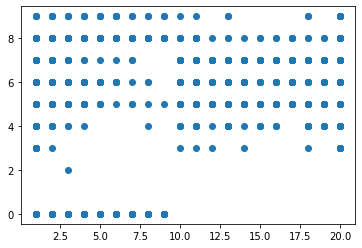

In [16]:
plt.scatter(df.num_reviews,df.review_score)
plt.show()

In [19]:
df.review_score.value_counts()

0    2102
5     658
7     607
8     587
6     482
4     122
9      44
3      19
2       1
Name: review_score, dtype: int64

In [29]:
df.review_score

0       0
1       8
2       0
3       7
4       7
       ..
4617    7
4618    7
4619    9
4620    0
4621    0
Name: review_score, Length: 4622, dtype: int64

In [28]:
df.review_score_desc

0                4 user reviews
1                 Very Positive
2                1 user reviews
3                      Positive
4                      Positive
                 ...           
4617                   Positive
4618                   Positive
4619    Overwhelmingly Positive
4620             4 user reviews
4621             2 user reviews
Name: review_score_desc, Length: 4622, dtype: object

In [30]:
df.total_positive

0           1
1         130
2           1
3          17
4           8
        ...  
4617       12
4618       26
4619    29369
4620        4
4621        1
Name: total_positive, Length: 4622, dtype: int64

In [31]:
df.total_negative

0         3
1         4
2         0
3         1
4         2
       ... 
4617      1
4618      4
4619    629
4620      0
4621      1
Name: total_negative, Length: 4622, dtype: int64

In [38]:
df.detailed_description[3]


'<img src="https://cdn.akamai.steamstatic.com/steam/apps/1198600/extras/aboutthegamesteam.png?t=1600620214" /><br>Pizza Time Explosion is a fast-paced, arcade-style game in which you collect billions of pizza slices in order to create a pizza star with critical pizza mass, causing the pizza time explosion and ending worldwide pizza shortage.<br><br>You, as a pizza slice, must traverse the Pizza Dimension in search of pizza toppings, each of which allows you to generate more pizza to add to the star. You\'ll have to avoid a myriad of obstacles on your way, however, such as all of the garbage that\'s been dumped there, and the flies it has attracted (nobody wants flies on their pizza)!<br><br><img src="https://cdn.akamai.steamstatic.com/steam/apps/1198600/extras/featuressteam.png?t=1600620214" /><br><ul class="bb_ul"><li>Six unlockable circuits to play<br></li><li>30 total different difficulty/challenge modes to choose from and master! (27 combinations in normal mode, and three unlockabl